In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

NUM_SEEDS = 10

In [2]:
matrixName2n = {
    "ash292": 292,
    "ash85": 85,
    "bcspwr01": 39,
    "bcspwr02": 49,
    "bcspwr03": 118,
    "bcspwr04": 274,
    "bcspwr05": 443,
    "can_144": 144,
    "can_161": 161,
    "can_187": 187,
    "can_229": 229,
    "can_24": 24,
    "can_256": 256,
    "can_268": 268,
    "can_292": 292,
    "can_445": 445,
    "can_61": 61,
    "can_62": 62,
    "can_634": 634,
    "can_715": 715,
    "can_73": 73,
    "can_838": 838,
    "can_96": 96,
    "dwt_162": 162,
    "dwt_193": 193,
    "dwt_209": 209,
    "dwt_221": 221,
    "dwt_245": 245,
    "dwt_307": 307,
    "dwt_310": 310,
    "dwt_361": 361,
    "dwt_419": 419,
    "dwt_503": 503,
    "dwt_59": 59,
    "dwt_592": 592,
    "dwt_66": 66,
    "dwt_72": 72,
    "dwt_758": 758,
    "dwt_869": 869,
    "dwt_87": 87,
    "dwt_878": 878,
    "dwt_918": 918,
    "dwt_992": 992,
    "jagmesh1": 936,
    "lshp_265": 265,
    "lshp_406": 406,
    "lshp_577": 577,
    "lshp_778": 778,
    "G1": 800,
    "G14": 800,
    "G15": 800,
    "G16": 800,
    "G17": 800,
    "G2": 800,
    "G3": 800,
    "G4": 800,
    "G43": 1000,
    "G44": 1000,
    "G45": 1000,
    "G46": 1000,
    "G47": 1000,
    "G5": 800,
    "G51": 1000,
    "G52": 1000,
    "G53": 1000,
    "G54": 1000,
    "mesh3e1": 289,
    "mesh3em5": 289,
    "sphere2": 66,
    "sphere3": 258,
    "lap_25": 25,
    "GD06_theory": 101,
    "GD96_c": 65,
    "GD97_a": 84,
    "GD98_c": 112,
    "GD99_b": 64,
    "Journals": 124,
    "Sandi_authors": 86,
    "USAir97": 332,
    "EX1": 560,
    "EX2": 560,
    "Trefethen_20b": 19,
    "Trefethen_20": 20,
    "Trefethen_150": 150,
    "Trefethen_200b": 199,
    "Trefethen_200": 200,
    "Trefethen_300": 300,
    "Trefethen_500": 500,
    "Trefethen_700": 700,
    "adjnoun": 112,
    "dolphins": 62,
    "football": 115,
    "karate": 34,
    "lesmis": 77,
    "polbooks": 105,
    "jazz": 198,
    "celegans_metabolic": 453,
    "grid1": 252,
    "grid1_dual": 224,
    "netz4504_dual": 615,
    "L": 956,
    "cage": 366,
    "chesapeake": 39,
    "mycielskian2": 2,
    "mycielskian3": 5,
    "mycielskian4": 11,
    "mycielskian5": 23,
    "mycielskian6": 47,
    "mycielskian7": 95,
    "mycielskian8": 191,
    "mycielskian9": 383,
    "mycielskian10": 767,
    "breasttissue_10NN": 106,
    "collins_15NN": 1000,
    "dermatology_5NN": 366,
    "Ecoli_10NN": 336,
    "Glass_10NN": 214,
    "iris_dataset_30NN": 150,
    "micromass_10NN": 571,
    "Olivetti_norm_10NN": 400,
    "Spectro_10NN": 531,
    "umistfacesnorm_10NN": 575,
    "Vehicle_10NN": 846,
    "YaleA_10NN": 165,
}

In [3]:
def parse_hist_file(file_path):

    data = {}
    with open(file_path, "r") as file:
        num_matrices, num_methods = map(int, file.readline().strip().split())

        for _ in range(num_matrices):
            matrix_name = file.readline().strip()
            data[matrix_name] = {}

            for _ in range(num_methods):
                method_name = file.readline().strip()
                data[matrix_name][method_name] = {}
                for idx in range(NUM_SEEDS):
                    data[matrix_name][method_name][idx] = {}
                    score_line = file.readline().strip()
                    score = float(score_line.split(": ")[1])
                    data[matrix_name][method_name][idx]["score"] = score

    return data

/tmp/ipykernel_2045/1508900419.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


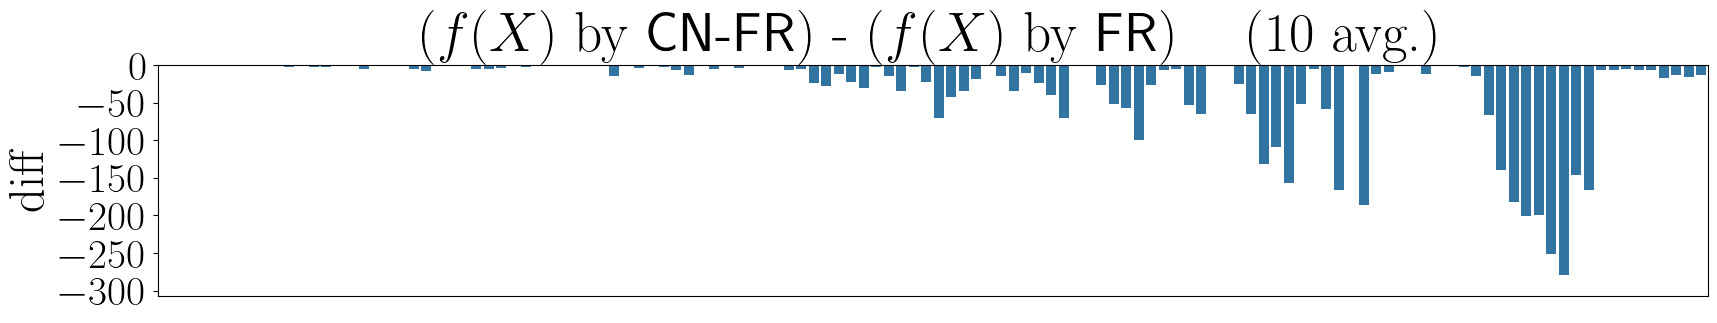

,Method_nonCN,matrixName,score_nonCN,n_nonCN,Method_CN,score_CN,n_CN,diff
112,FR,L,162.774557,956,CN-FR,-116.683105,956,-279.457662
111,FR,jagmesh1,170.941524,936,CN-FR,-81.105659,936,-252.047183
109,FR,dwt_878,217.367553,878,CN-FR,16.290546,878,-201.077007
110,FR,dwt_918,214.207051,918,CN-FR,14.970648,918,-199.236403
96,FR,lshp_778,143.854555,778,CN-FR,-42.127144,778,-185.981698
...,...,...,...,...,...,...,...,...
19,FR,sphere2,24.561567,66,CN-FR,24.567391,66,0.005823
7,FR,lap_25,9.567882,25,CN-FR,9.595882,25,0.027999
11,FR,mycielskian6,39.398663,47,CN-FR,39.448986,47,0.050322
3,FR,Trefethen_20b,12.112545,19,CN-FR,12.189092,19,0.076547


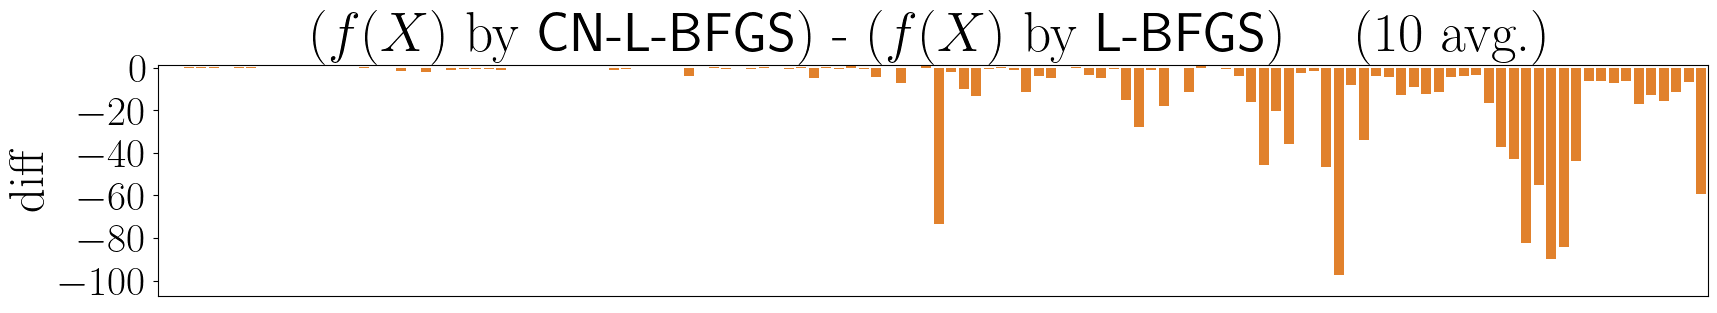

,Method_nonCN,matrixName,score_nonCN,n_nonCN,Method_CN,score_CN,n_CN,diff
94,L-BFGS,dwt_758,-176.603772,758,CN-L-BFGS,-274.181566,758,-97.577794
111,L-BFGS,jagmesh1,-184.377532,936,CN-L-BFGS,-274.320766,936,-89.943233
112,L-BFGS,L,-144.954768,956,CN-L-BFGS,-229.047362,956,-84.092594
109,L-BFGS,dwt_878,-59.261717,878,CN-L-BFGS,-141.726397,878,-82.464680
62,L-BFGS,mesh3em5,-312.358347,289,CN-L-BFGS,-385.866211,289,-73.507864
...,...,...,...,...,...,...,...,...
53,L-BFGS,grid1_dual,-7.090265,224,CN-L-BFGS,-6.819300,224,0.270965
67,L-BFGS,dwt_307,60.034801,307,CN-L-BFGS,60.372578,307,0.337777
55,L-BFGS,dwt_245,7.469189,245,CN-L-BFGS,8.101928,245,0.632739
83,L-BFGS,Spectro_10NN,-187.448119,531,CN-L-BFGS,-186.627606,531,0.820512


In [4]:
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
tab = sns.color_palette("tab10")

file_path = "hist_50.txt"
parsed_data = parse_hist_file(file_path)

df = pd.DataFrame(columns=["Method", "matrixName", "score"])
for matrix_name, matrix_data in parsed_data.items():
    for method_name, method_data in matrix_data.items():
        for seed_idx, seed_data in method_data.items():
            df = pd.concat(
                [
                    df,
                    pd.DataFrame(
                        {
                            "Method": [method_name],
                            "matrixName": [matrix_name],
                            "score": [seed_data["score"]],
                        }
                    ),
                ]
            )

df_mean = df.groupby(["Method", "matrixName"]).mean().reset_index()

# sort rows by the n of the matrix
df_mean["n"] = df_mean["matrixName"].map(matrixName2n)
df_mean = df_mean.sort_values("n")

for methodSuffix in ["FR", "L-BFGS"]:
    df_nonCN = df_mean[df_mean["Method"] == methodSuffix]
    df_CN = df_mean[df_mean["Method"] == "CN-" + methodSuffix]
    df_merged = pd.merge(df_nonCN, df_CN, on="matrixName", suffixes=(f"_nonCN", f"_CN"))
    df_merged["diff"] = df_merged["score_CN"] - df_merged["score_nonCN"]

    plt.figure(figsize=(20, 3))
    sns.barplot(
        x="matrixName",
        y="diff",
        data=df_merged,
        color=tab[0 if methodSuffix == "FR" else 1],
    )

    plt.xticks([])
    plt.yticks(fontsize=30)
    plt.xlabel("")
    plt.ylabel("diff", fontsize=35)

    minScore = min(0, df_merged["diff"].min())
    maxScore = max(0, df_merged["diff"].max())
    plt.ylim(minScore * 1.1, maxScore * 1.1)

    plt.title(
        f"($f(X)$ by \\textsf{{CN-{methodSuffix}}}) - ($f(X)$ by \\textsf{{{methodSuffix}}}) \\quad (10 avg.)",
        fontsize=40,
    )
    plt.savefig(f"plot/diff_{methodSuffix}_{file_path[5:7]}.pdf", bbox_inches="tight")
    # plt.close()
    plt.show()

    # display df_merged sorted be "diff"
    display(df_merged.sort_values("diff"))

In [5]:
import networkx as nx
from src.python.vis.visGraph import visGraph


def read_file(file_path):
    with open(file_path, "r") as file:
        n, m, _k = map(float, file.readline().strip().split())
        assert n == int(n) and m == int(m)
        n = int(n)
        m = int(m)
        row = []
        col = []
        data = []
        for _ in range(m):
            r, c, d = map(float, file.readline().strip().split())
            assert r == int(r) and c == int(c)
            r = int(r)
            c = int(c)
            row.append(r)
            col.append(c)
            data.append(d)
        positions_size = int(file.readline().strip())
        positions = []
        for _ in range(positions_size):
            position = []
            for _ in range(n):
                x, y = map(float, file.readline().strip().split())
                position.extend([x, y])
            positions.append(position)

    print(n, m, f"{2*n*n*n/m}")

    Gs = []
    for pos in positions:
        G = nx.Graph()
        for i in range(n):
            G.add_node(i, pos=(pos[2 * i], pos[2 * i + 1]))
        for i in range(m):
            G.add_edge(row[i], col[i], weight=data[i])
        Gs.append(G)

    return Gs


for file_path, idx in [
    ("out/Spectro_10NN_L-BFGS_50.out", -50 - 1),
    ("out/Spectro_10NN_CN-L-BFGS_50.out", -50 - 1),
    ("out/Spectro_10NN_CN-L-BFGS_200.out", -200 - 1),
]:
    print(file_path)
    Gs = read_file(file_path)
    for i in [idx, -1]:
        which = "last" if i == -1 else "first"
        G = Gs[i]
        savePath = "vis/" + file_path.split("/")[-1].replace(".out", f"_{which}.png")
        if "200" in file_path:
            if i != -1:
                continue
            savePath = savePath.replace("_200_last", "_50_final")
        visGraph(G, nx.get_node_attributes(G, "pos"), savePath=savePath)

out/Spectro_10NN_L-BFGS_50.out
531 3711 80690.5367825384
out/Spectro_10NN_CN-L-BFGS_50.out
531 3711 80690.5367825384
out/Spectro_10NN_CN-L-BFGS_200.out
531 3711 80690.5367825384
